In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os


# Color Test

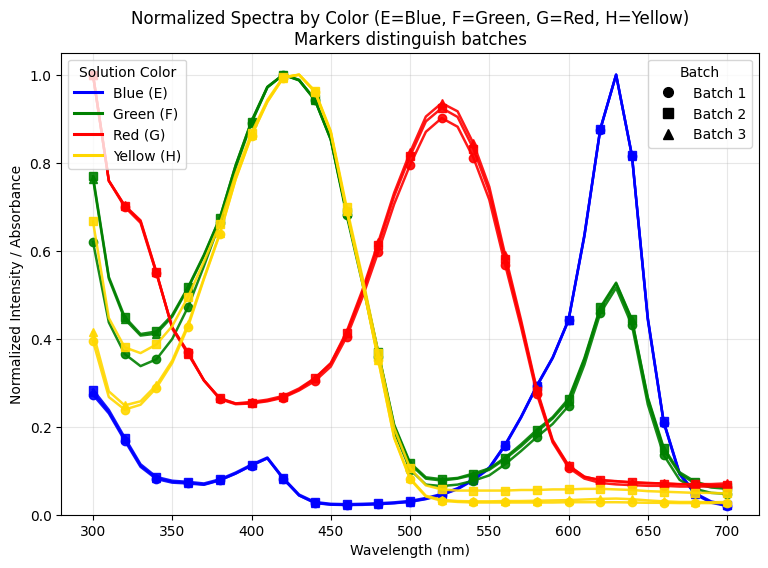

In [3]:
# Load data
df = pd.read_csv('Fractions_August19_2025.csv')

# Configs from your instruction
solution_colors = {
    "E": "blue",   # Blue
    "F": "green",  # Green
    "G": "red",    # Red
    "H": "gold"    # Yellow
}
# Batches in the file: 1 (Batch 1), 3 (Batch 2), 5 (Batch 3 per your latest note)
batch_cols = ["1", "3", "5"]
batch_labels = {"1": "Batch 1", "3": "Batch 2", "5": "Batch 3"}
batch_markers = {"1": "o", "3": "s", "5": "^"}

# Normalize helper (per-curve max)
def normalize_series(s: pd.Series) -> pd.Series:
    m = s.max()
    if pd.isna(m) or m == 0:
        return s * 0
    return s / m

w = df["Wavelength"]

plt.figure(figsize=(9, 6))

# Plot all four color families on the same axes
for base in ["E", "F", "G", "H"]:
    for b in batch_cols:
        col = f"{base}{b}"
        if col in df.columns:
            y = normalize_series(df[col])
            plt.plot(
                w, y,
                color=solution_colors[base],
                marker=batch_markers[b],
                markevery=max(len(w)//18, 1),  # sprinkle markers, not every point
                linewidth=1.8,
                alpha=0.9
            )

plt.title("Normalized Spectra by Color (E=Blue, F=Green, G=Red, H=Yellow)\nMarkers distinguish batches")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Intensity / Absorbance")
plt.ylim(0, 1.05)
plt.grid(True, alpha=0.3)

# Build two clean legends: one for colors, one for batches
color_handles = [
    Line2D([0], [0], color=solution_colors[c], lw=2.2, label={"E":"Blue (E)", "F":"Green (F)", "G":"Red (G)", "H":"Yellow (H)"}[c])
    for c in ["E", "F", "G", "H"]
]
batch_handles = [
    Line2D([0], [0], color="black", marker=batch_markers[b], linestyle="None", label=batch_labels[b], markersize=7)
    for b in batch_cols
]

leg1 = plt.legend(handles=color_handles, loc="upper left", title="Solution Color")
plt.gca().add_artist(leg1)
plt.legend(handles=batch_handles, loc="upper right", title="Batch")
plt.show()



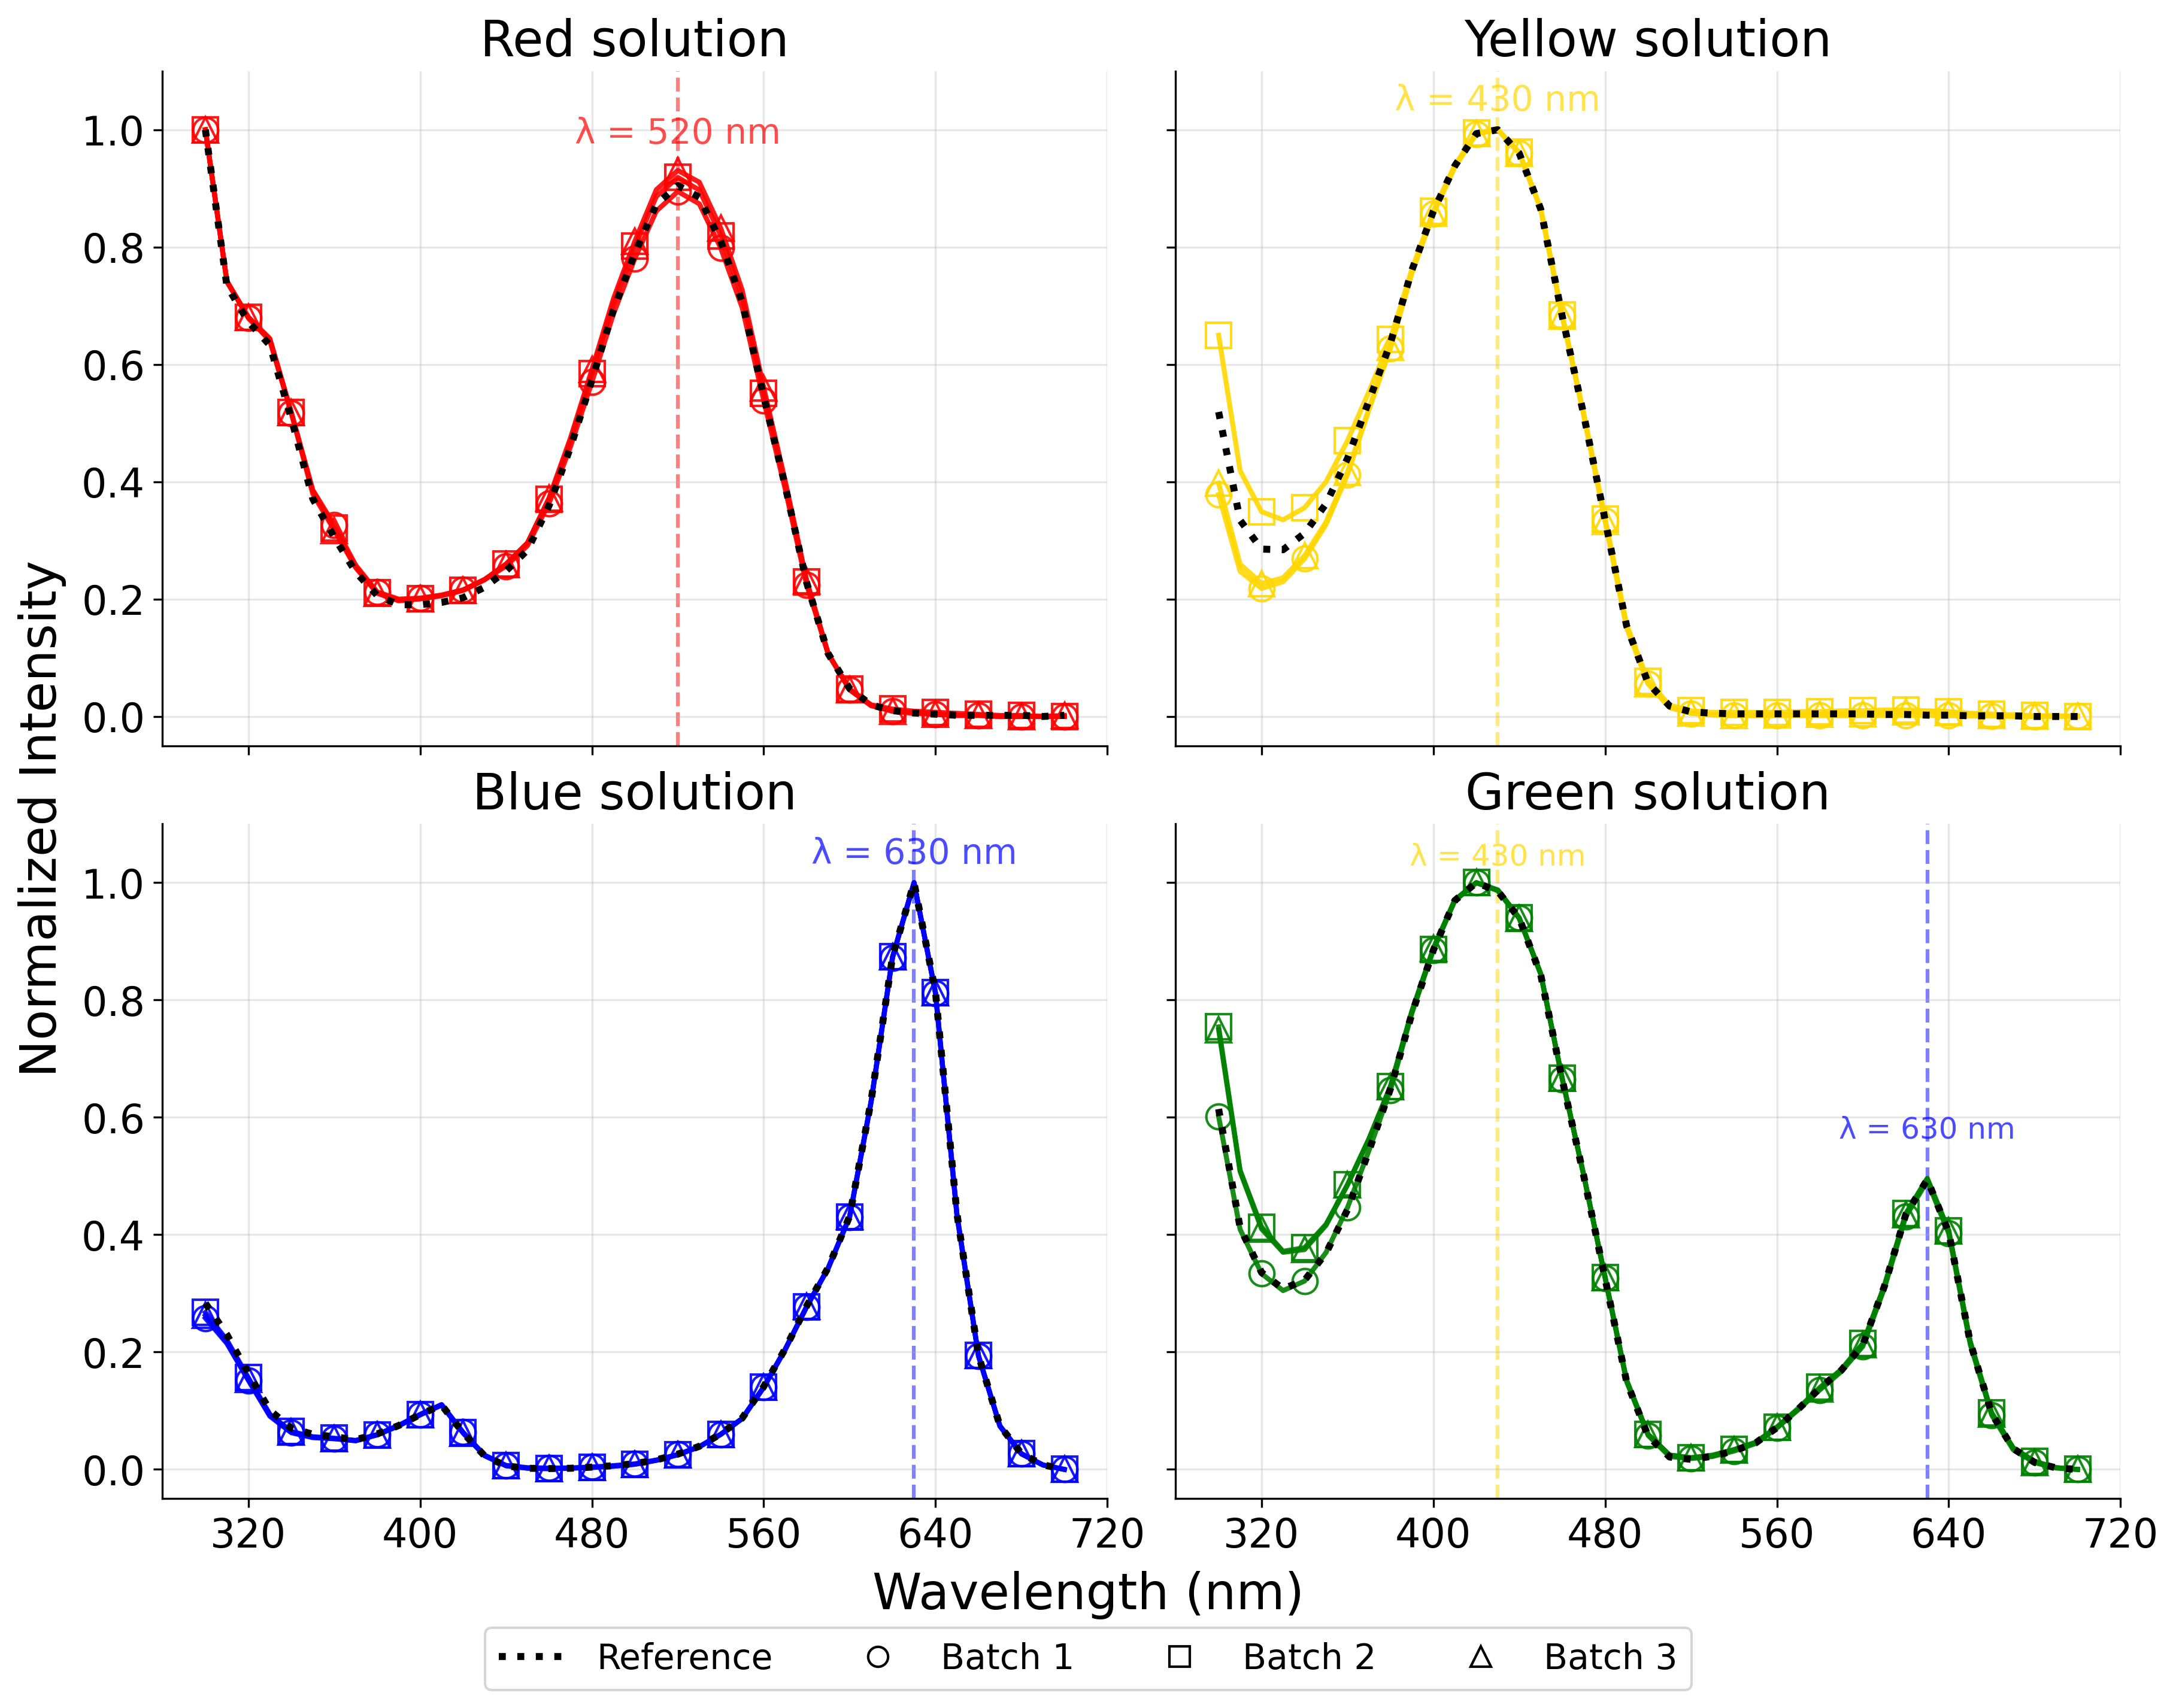

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator

# Load
df = pd.read_csv("Fractions_August19_2025.csv")
w = df["Wavelength"].values

solution_colors = {"E": "blue", "F": "green", "G": "red", "H": "gold"}
panel_titles = {"E": "Blue", "F": "Green", "G": "Red", "H": "Yellow"}
batch_cols = ["1","3","5"]
batch_labels = {"1":"Batch 1","3":"Batch 2","5":"Batch 3"}
batch_markers = {"1":"o","3":"s","5":"^"}
ref_suffix = "12"

def minmax_normalize(y):
    y = np.asarray(y, float)
    r = y.max() - y.min()
    return (y - y.min())/r if r != 0 else np.zeros_like(y)

def find_peak_xy(wl, y, lo=350, hi=700):
    m = (wl>=lo) & (wl<=hi)
    if not np.any(m): return None
    i = np.nanargmax(y[m])
    return float(wl[m][i]), float(y[m][i])

fig, axes = plt.subplots(2,2, figsize=(12,9), sharex=True, sharey=True, constrained_layout=True, dpi = 300)
axes = axes.flatten()
mark_every = max(len(w)//20, 1)

for i, base in enumerate(["G","H","E","F"]):
    ax = axes[i]

    # Reference
    ref_col = f"{base}{ref_suffix}"
    if ref_col in df.columns:
        y_ref = minmax_normalize(df[ref_col].values)
        ax.plot(w, y_ref, color="black", linestyle=":", linewidth=2.8,
                label="Reference", zorder=3)

        if base == "F":  # Green panel: show yellow@420 and blue@630
            # (target_nm, color_key)
            for target, ckey in [(430, "H"), (630, "E")]:
                idx = (np.abs(w - target)).argmin()
                px, py = w[idx], y_ref[idx]
                ax.axvline(px, color=solution_colors[ckey],
                        linewidth=1.5, linestyle="--", zorder=1, alpha=0.5)
                ax.text(px, min(py + 0.06, 1.02), f"λ = {int(round(px))} nm",
                        ha="center", va="bottom", fontsize=12,
                        color=solution_colors[ckey], alpha=0.7)
        else:
            # Other panels: line + label in the panel's own color
            pk = find_peak_xy(w, y_ref, lo=340, hi=720)
            if pk:
                px, py = pk
                ax.axvline(px, color=solution_colors[base],
                        linewidth=1.5, linestyle="--", zorder=1, alpha=0.5)
                ax.text(px, min(py + 0.06, 1.02), f"λ = {int(round(px))} nm",
                        ha="center", va="bottom", fontsize=14,
                        color=solution_colors[base], alpha=0.7)

    # Batches
    for b in batch_cols:
        col = f"{base}{b}"
        if col in df.columns:
            y = minmax_normalize(df[col].values)
            ax.plot(
                w, y,
                color=solution_colors[base],        # line color
                marker=batch_markers[b],
                markevery=mark_every,
                linewidth=2.0,
                alpha=0.9,
                label=batch_labels[b],
                zorder=2,
                markerfacecolor='none',             # <-- hollow markers
                markeredgecolor=solution_colors[base],
                markersize=10
            )


    ax.set_title(f"{panel_titles[base]} solution", fontsize=20, pad=6)
    ax.grid(alpha=0.3)
    ax.set_ylim(-0.05, 1.1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=6, integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.tick_params(labelsize=16)

fig.supxlabel("Wavelength (nm)", fontsize=20)
fig.supylabel("Normalized Intensity", fontsize=20)

handles = [Line2D([0],[0], color="black", linestyle=":", lw=2.8, label="Reference")] + [
    Line2D([0],[0],
           color="black",
           marker=batch_markers[b],
           linestyle="None",
           lw=2,
           label=batch_labels[b],
           markerfacecolor='none',
           markeredgecolor="black",
           markersize=8)
    for b in batch_cols
]

fig.legend(handles=handles, loc="lower center", ncol=4,
           fontsize=14, bbox_to_anchor=(0.5, -0.05))

plt.show()


# Volume Accuracy

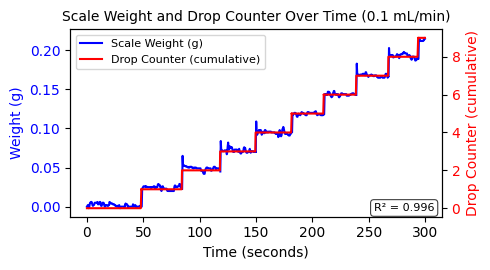

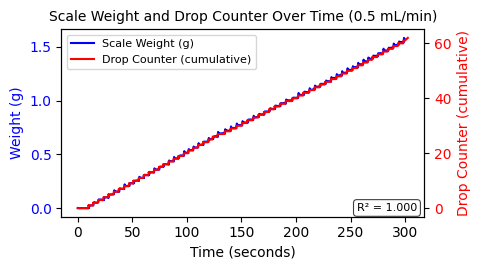

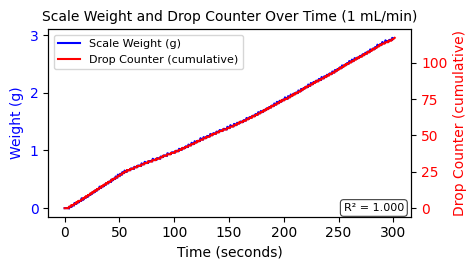

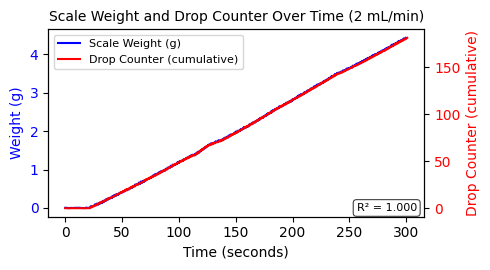

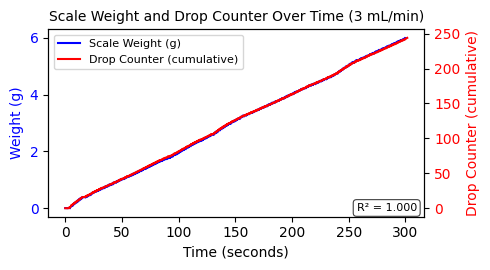

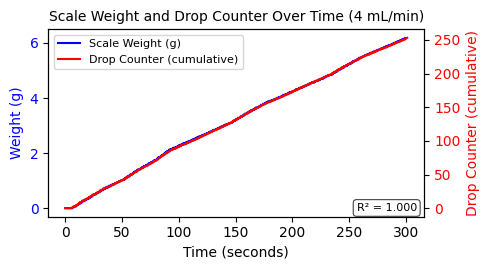

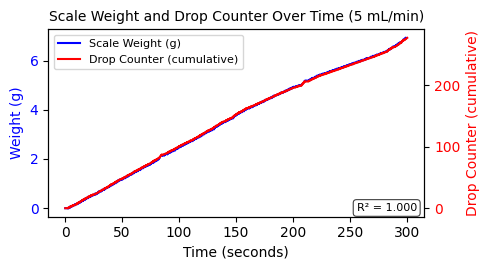

In [14]:
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === File List (in desired order) ===
csv_files = [
    "volume_accuracy_01ml_per_min.csv",
    "volume_accuracy_05ml_per_min.csv",
    "volume_accuracy_1ml_per_min.csv",
    "volume_accuracy_2ml_per_min.csv",
    "volume_accuracy_3ml_per_min.csv",
    "volume_accuracy_4ml_per_min.csv",
    "volume_accuracy_5ml_per_min.csv"
]

def _linfit_r2(x, y):
    """Return slope, intercept, R^2 for y ~ a*x + b using finite points only."""
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[mask], y[mask], 1)
    yhat = a * x[mask] + b
    ss_res = np.sum((y[mask] - yhat)**2)
    ss_tot = np.sum((y[mask] - y[mask].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _pretty_rate_label(file):
    """Produce a label like '0.1 mL/min' or '2 mL/min' from filename."""
    m = re.search(r"volume_accuracy_(.+?)_per_min\.csv$", file)
    rate = m.group(1) if m else ""
    num = rate.replace("ml", "")
    if len(num) == 2 and num.startswith("0"):   # '01' -> '0.1', '05' -> '0.5'
        num_val = f"0.{num[1]}"
    else:
        num_val = num
    return f"{num_val} mL/min"

def _get_drop_series(df):
    """Return cumulative drop counter, tolerant to column naming."""
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found (expected 'drop_counter' or 'vernier_drop').")

# === Plotting Function ===
def plot_volume_accuracy(file):
    label = _pretty_rate_label(file)

    # Load CSV
    df = pd.read_csv(file)
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

    # Prepare series (full series; no shifting)
    weight = pd.to_numeric(df["weight"], errors="coerce")
    drops = _get_drop_series(df)

    # Time from first timestamp
    df["time_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()

    # R^2 between scale weight and drop counter
    _, _, r2 = _linfit_r2(drops, weight)

    # Compact plot
    fig, ax1 = plt.subplots(figsize=(5.0, 2.8))
    ax1.plot(df["time_sec"], weight, color="blue", label="Scale Weight (g)")
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Weight (g)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx()
    ax2.plot(df["time_sec"], drops, color="red", label="Drop Counter (cumulative)")
    ax2.set_ylabel("Drop Counter (cumulative)", color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    # Combined legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left", fontsize=8)

    # R^2 annotation only
    ax1.text(
        0.98, 0.02, f"R² = {r2:.3f}" if np.isfinite(r2) else "R² = n/a",
        transform=ax1.transAxes, ha="right", va="bottom", fontsize=8,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.75, linewidth=0.8)
    )

    plt.title(f"Scale Weight and Drop Counter Over Time ({label})", fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close(fig)

# === Run the plotting for all files ===
for file in csv_files:
    if os.path.exists(file):
        plot_volume_accuracy(file)
    else:
        print(f"File not found: {file}")


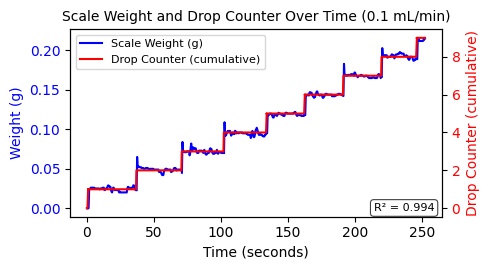

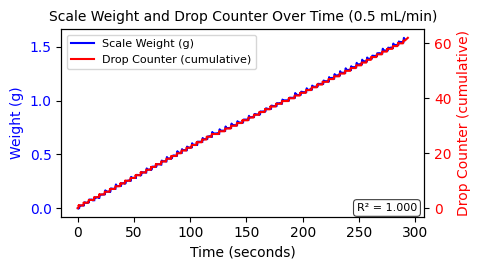

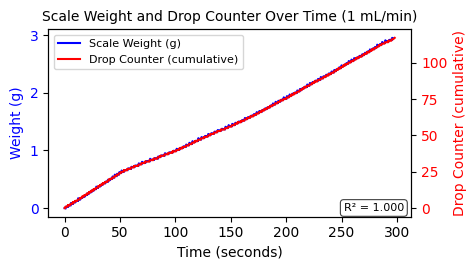

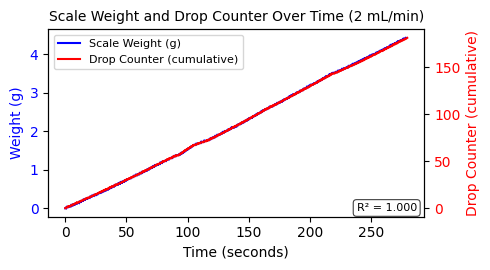

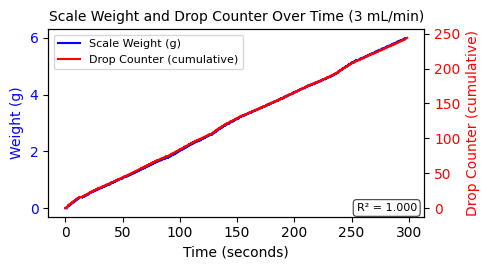

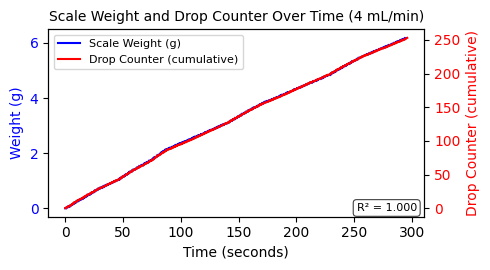

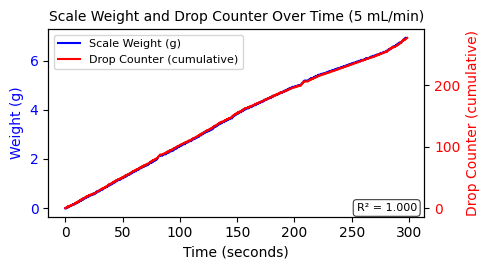

In [75]:
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === File List (in desired order) ===
csv_files = [
    "volume_accuracy_01ml_per_min.csv",
    "volume_accuracy_05ml_per_min.csv",
    "volume_accuracy_1ml_per_min.csv",
    "volume_accuracy_2ml_per_min.csv",
    "volume_accuracy_3ml_per_min.csv",
    "volume_accuracy_4ml_per_min.csv",
    "volume_accuracy_5ml_per_min.csv"
]

def _linfit_r2(x, y):
    """Return slope, intercept, R^2 for y ~ a*x + b using finite points only."""
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[mask], y[mask], 1)
    yhat = a * x[mask] + b
    ss_res = np.sum((y[mask] - yhat)**2)
    ss_tot = np.sum((y[mask] - y[mask].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _pretty_rate_label(file):
    """Produce a label like '0.1 mL/min' or '2 mL/min' from filename."""
    m = re.search(r"volume_accuracy_(.+?)_per_min\.csv$", file)
    rate = m.group(1) if m else ""
    num = rate.replace("ml", "")
    if len(num) == 2 and num.startswith("0"):   # '01' -> '0.1', '05' -> '0.5'
        num_val = f"0.{num[1]}"
    else:
        num_val = num
    return f"{num_val} mL/min"

def _get_drop_series(df):
    """Return cumulative drop counter, tolerant to column naming."""
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found (expected 'drop_counter' or 'vernier_drop').")

def _first_drop_index(drops: pd.Series) -> int:
    """Index of first positive increment in the cumulative counter."""
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# === Plotting Function (start 1s before first drop, re-zero drops at new start) ===
def plot_volume_accuracy(file):
    label = _pretty_rate_label(file)

    # Load CSV
    df = pd.read_csv(file)

    # Force proper datetime; coerce bad rows to NaT
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
    if df["timestamp"].isna().all():
        print(f"[WARN] All timestamps NaT in {file}; skipping.")
        return

    # Prepare series
    weight = pd.to_numeric(df["weight"], errors="coerce")
    drops  = _get_drop_series(df)

    # Find first detected drop (first positive increment)
    i_first = _first_drop_index(drops)
    first_ts = df["timestamp"].iloc[i_first]
    if pd.isna(first_ts):
        # fallback: first non-NaT timestamp
        first_ts = df["timestamp"].dropna().iloc[0]

    # Start 1s earlier than first drop (datetime-aware search)
    start_ts = first_ts - pd.Timedelta(seconds=1)
    # Use Pandas Series.searchsorted (handles datetime64[ns] safely)
    start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

    # Slice from start_idx onward
    df = df.iloc[start_idx:].copy()
    weight = weight.iloc[start_idx:].reset_index(drop=True)
    drops  = drops.iloc[start_idx:].reset_index(drop=True)

    if len(df) < 2:
        print(f"[WARN] Not enough data after shifting in {file}; skipping plot.")
        return

    # Recompute time axis (t=0 at start) and re-zero drops
    df["time_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()
    drops = drops - drops.iloc[0]

    # R^2 in shifted window
    _, _, r2 = _linfit_r2(drops, weight)

    # Compact plot
    fig, ax1 = plt.subplots(figsize=(5.0, 2.8))
    ax1.plot(df["time_sec"], weight, color="blue", label="Scale Weight (g)")
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Weight (g)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    #ax1.set_ylim(-0.350, 7.275)

    ax2 = ax1.twinx()
    ax2.plot(df["time_sec"], drops, color="red", label="Drop Counter (cumulative)")
    ax2.set_ylabel("Drop Counter (cumulative)", color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    #ax2.set_ylim(-13.850, 290.850)

    # Combined legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left", fontsize=8)

    # R^2 annotation only
    ax1.text(
        0.98, 0.02, f"R² = {r2:.3f}" if np.isfinite(r2) else "R² = n/a",
        transform=ax1.transAxes, ha="right", va="bottom", fontsize=8,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.75, linewidth=0.8)
    )

    plt.title(f"Scale Weight and Drop Counter Over Time ({label})", fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close(fig)

# === Run the plotting for all files ===
for file in csv_files:
    if os.path.exists(file):
        plot_volume_accuracy(file)
    else:
        print(f"File not found: {file}")


Left (weight) ylim:  -0.350, 7.275
Right (drops)  ylim: -13.850, 290.850


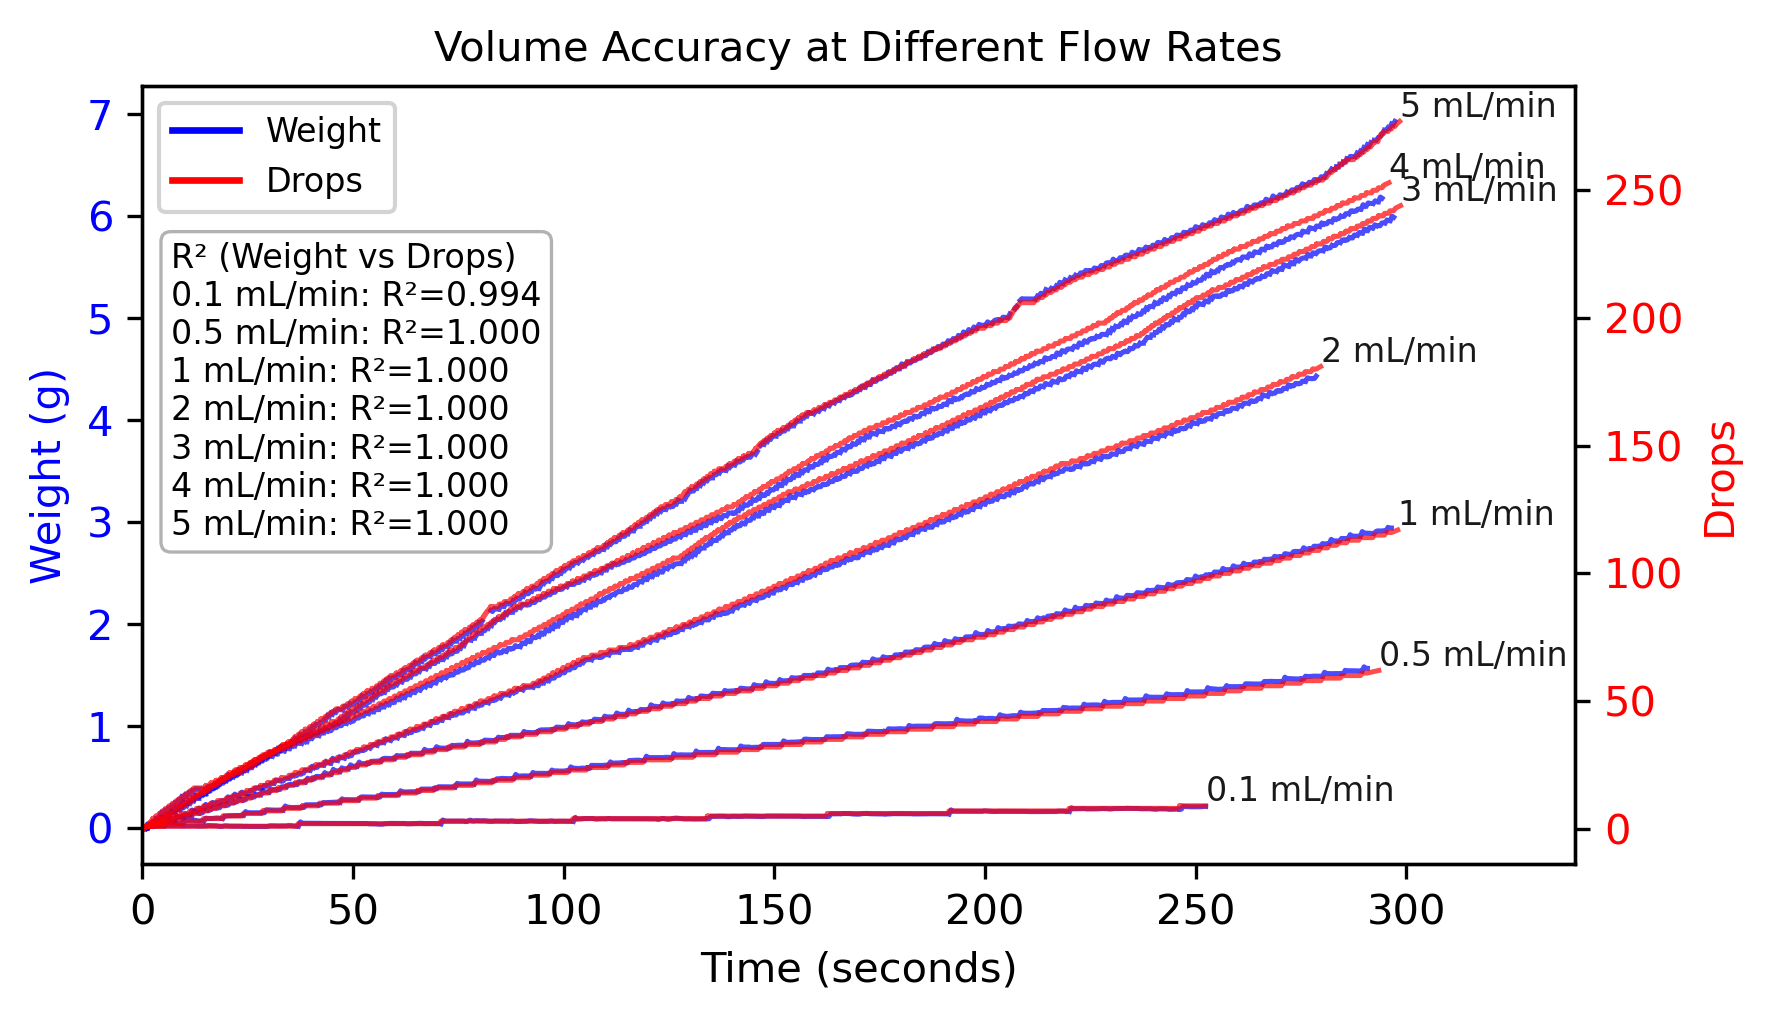

In [1]:
import os, re, itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# === File List (in desired order) ===
csv_files = [
    "volume_accuracy_01ml_per_min.csv",
    "volume_accuracy_05ml_per_min.csv",
    "volume_accuracy_1ml_per_min.csv",
    "volume_accuracy_2ml_per_min.csv",
    "volume_accuracy_3ml_per_min.csv",
    "volume_accuracy_4ml_per_min.csv",
    "volume_accuracy_5ml_per_min.csv"
]

def _linfit_r2(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[m], y[m], 1)
    yhat = a * x[m] + b
    ss_res = np.sum((y[m] - yhat)**2)
    ss_tot = np.sum((y[m] - y[m].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _pretty_rate_label(file):
    m = re.search(r"volume_accuracy_(.+?)_per_min\.csv$", file)
    rate = m.group(1) if m else ""
    num = rate.replace("ml", "")
    if len(num) == 2 and num.startswith("0"):   # '01' -> 0.1, '05' -> 0.5
        num_val = f"0.{num[1]}"
    else:
        num_val = num
    return f"{num_val} mL/min"

def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found (expected 'drop_counter' or 'vernier_drop').")

def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# === Plot ALL flow rates on one figure (shift to 1s before first drop, re-zero drops) ===
def plot_all_volume_accuracy(files):
    records = []
    for file in files:
        if not os.path.exists(file):
            print(f"[WARN] File not found: {file}")
            continue

        df = pd.read_csv(file)
        if "timestamp" not in df.columns or "weight" not in df.columns:
            print(f"[WARN] Missing required columns in {file}; skipping.")
            continue

        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
        if df["timestamp"].isna().all():
            print(f"[WARN] All timestamps NaT in {file}; skipping.")
            continue

        weight = pd.to_numeric(df["weight"], errors="coerce")
        drops  = _get_drop_series(df)

        # Shift start: 1 s before first detected drop
        i_first = _first_drop_index(drops)
        first_ts = df["timestamp"].iloc[i_first]
        if pd.isna(first_ts):
            first_ts = df["timestamp"].dropna().iloc[0]
        start_ts = first_ts - pd.Timedelta(seconds=1)
        start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

        df = df.iloc[start_idx:].copy()
        if len(df) < 2:
            print(f"[WARN] Not enough data after shifting in {file}; skipping.")
            continue

        weight = weight.iloc[start_idx:].reset_index(drop=True)
        drops  = drops.iloc[start_idx:].reset_index(drop=True)

        df["time_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()
        drops = drops - drops.iloc[0]

        _, _, r2 = _linfit_r2(drops, weight)

        records.append(dict(
            label=_pretty_rate_label(file),
            t=df["time_sec"].to_numpy(),
            w=weight.to_numpy(),
            d=drops.to_numpy(),
            r2=r2
        ))

    if not records:
        print("[WARN] No valid files to plot.")
        return

    fig, ax1 = plt.subplots(figsize=(6, 3.5), dpi=300)
    ax2 = ax1.twinx()

    # Plot each series with solid lines
    for rec in records:
        ax1.plot(rec["t"], rec["w"], linestyle="-", color="blue", linewidth=1.2, alpha=0.7)
        ax2.plot(rec["t"], rec["d"], linestyle="-", color="red",  linewidth=1.2, alpha=0.7)

    # Axis labels
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Weight (g)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax2.set_ylabel("Drops", color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    wmin, wmax = ax1.get_ylim()
    dmin, dmax = ax2.get_ylim()
    print(f"Left (weight) ylim:  {wmin:.3f}, {wmax:.3f}")
    print(f"Right (drops)  ylim: {dmin:.3f}, {dmax:.3f}")

    # Simple 2-item legend
    legend_lines = [
        Line2D([0], [0], color="blue", linewidth=1.6, label="Weight"),
        Line2D([0], [0], color="red",  linewidth=1.6, label="Drops"),
    ]
    ax1.legend(handles=legend_lines, loc="upper left", fontsize=8, framealpha=0.85)

    # Offsets for annotations
    w_all = [rec["w"] for rec in records if len(rec["w"]) > 0]
    d_all = [rec["d"] for rec in records if len(rec["d"]) > 0]
    if w_all:
        w_concat = np.concatenate(w_all)
        wy = np.nanmax(w_concat) - np.nanmin(w_concat)
        w_offset = 0.02 * wy if np.isfinite(wy) and wy > 0 else 0.0
    else:
        w_offset = 0.0
    if d_all:
        d_concat = np.concatenate(d_all)
        dy = np.nanmax(d_concat) - np.nanmin(d_concat)
        d_offset = 0.02 * dy if np.isfinite(dy) and dy > 0 else 0.0
    else:
        d_offset = 0.0

    # Flow-rate annotations (at last point of each curve)
    for rec in records:
        xt = rec["t"][-1]
        # label on drops axis
        ax2.text(xt, rec["d"][-1] + d_offset, rec["label"],
                 color="black", fontsize=8, ha="left", va="center", alpha=0.9,
                 bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0, linewidth=0.0))

    # R² summary box (optional)
    r2_lines = [f"{rec['label']}: R²={rec['r2']:.3f}" if np.isfinite(rec['r2']) else f"{rec['label']}: R²=n/a"
                for rec in records]
    ax1.text(
        0.02, 0.8, "R² (Weight vs Drops)\n" + "\n".join(r2_lines),
        transform=ax1.transAxes, ha="left", va="top", fontsize=8,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.3, linewidth=0.8)
    )

    plt.title("Volume Accuracy at Different Flow Rates", fontsize=10)
    plt.tight_layout()
    plt.xlim(0, 340)
    plt.show()
    plt.close(fig)

# === Run ===
plot_all_volume_accuracy(csv_files)


Left (weight) ylim:  -0.350, 7.275
Right (drops)  ylim: -13.850, 290.850


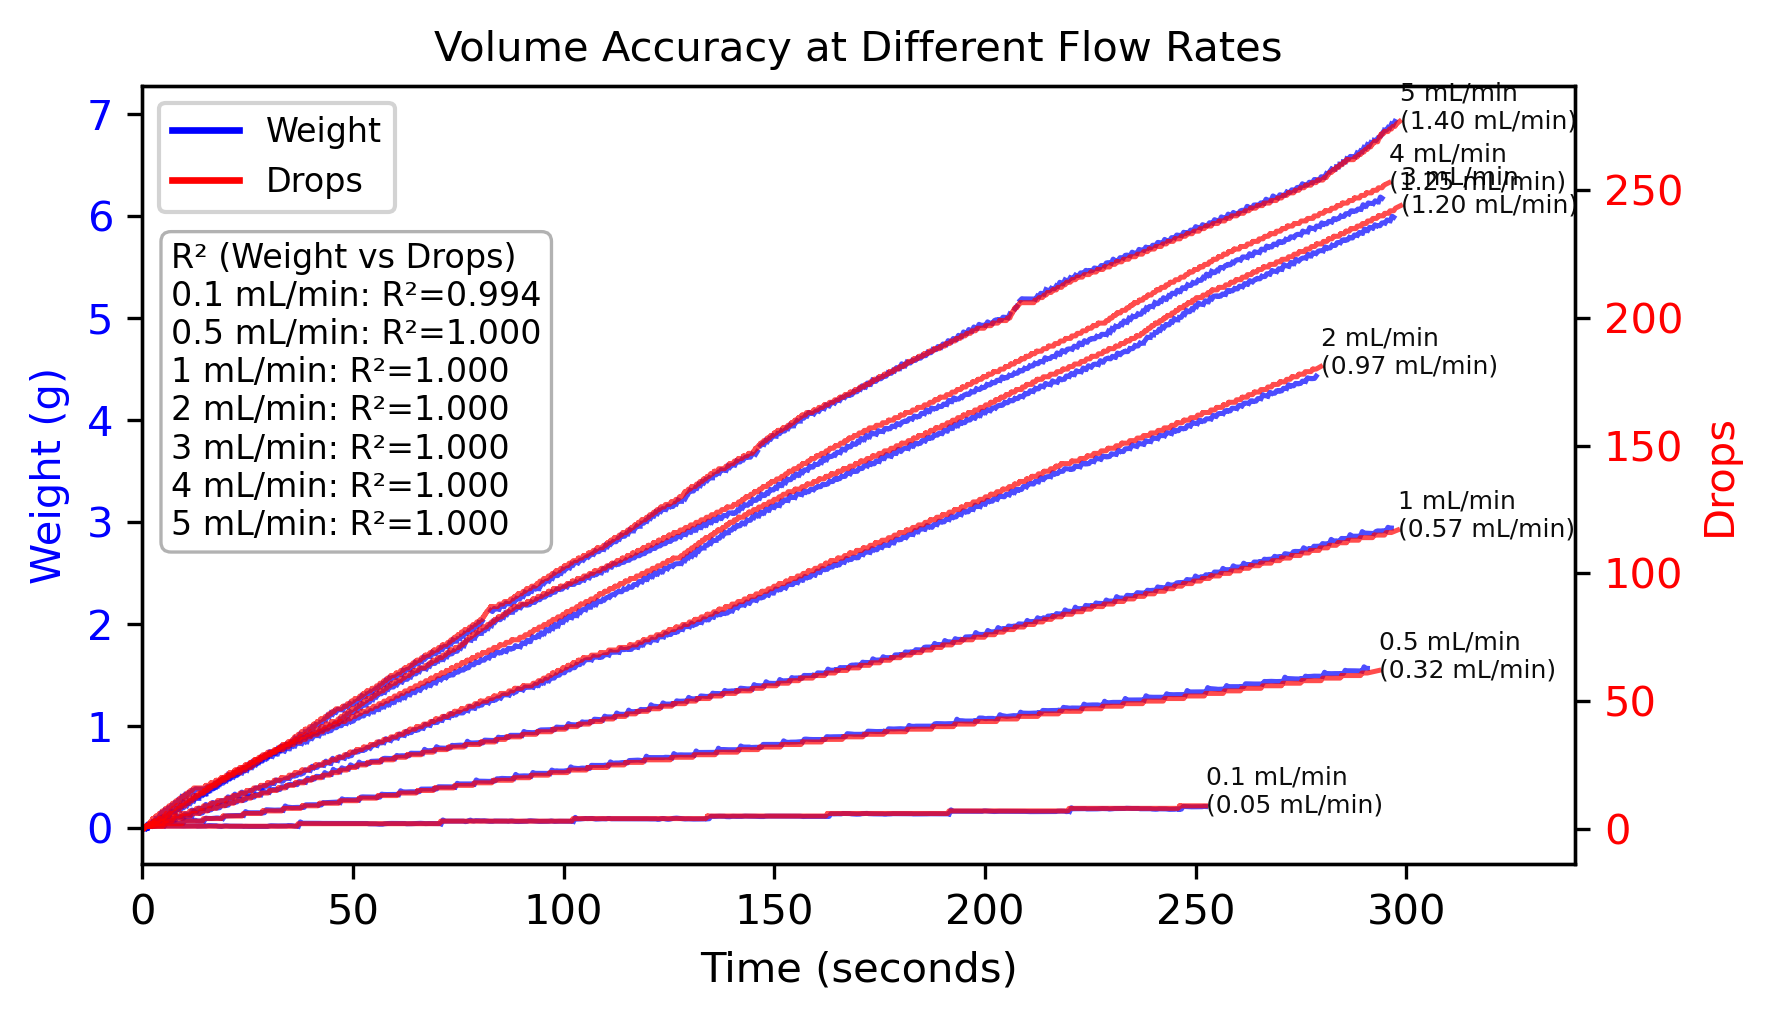

In [8]:
import os, re, itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# === File List (in desired order) ===
csv_files = [
    "volume_accuracy_01ml_per_min.csv",
    "volume_accuracy_05ml_per_min.csv",
    "volume_accuracy_1ml_per_min.csv",
    "volume_accuracy_2ml_per_min.csv",
    "volume_accuracy_3ml_per_min.csv",
    "volume_accuracy_4ml_per_min.csv",
    "volume_accuracy_5ml_per_min.csv"
]

DENSITY_G_PER_ML = 1.0  # change if your fluid is not ~1 g/mL

def _linfit_r2(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[m], y[m], 1)
    yhat = a * x[m] + b
    ss_res = np.sum((y[m] - yhat)**2)
    ss_tot = np.sum((y[m] - y[m].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _pretty_rate_label(file):
    m = re.search(r"volume_accuracy_(.+?)_per_min\.csv$", file)
    rate = m.group(1) if m else ""
    num = rate.replace("ml", "")
    if len(num) == 2 and num.startswith("0"):   # '01' -> 0.1, '05' -> 0.5
        num_val = f"0.{num[1]}"
    else:
        num_val = num
    return f"{num_val} mL/min"

def _expected_rate_value(file):
    m = re.search(r"volume_accuracy_(.+?)_per_min\.csv$", file)
    rate = m.group(1) if m else ""
    num = rate.replace("ml", "")
    if len(num) == 2 and num.startswith("0"):
        return float(f"0.{num[1]}")
    return float(num)

def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found (expected 'drop_counter' or 'vernier_drop').")

def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# === Plot ALL flow rates on one figure (shift to 1s before first drop, re-zero drops) ===
def plot_all_volume_accuracy(files):
    records = []
    for file in files:
        if not os.path.exists(file):
            print(f"[WARN] File not found: {file}")
            continue

        df = pd.read_csv(file)
        if "timestamp" not in df.columns or "weight" not in df.columns:
            print(f"[WARN] Missing required columns in {file}; skipping.")
            continue

        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
        if df["timestamp"].isna().all():
            print(f"[WARN] All timestamps NaT in {file}; skipping.")
            continue

        weight = pd.to_numeric(df["weight"], errors="coerce")
        drops  = _get_drop_series(df)

        # Shift start: 1 s before first detected drop
        i_first = _first_drop_index(drops)
        first_ts = df["timestamp"].iloc[i_first]
        if pd.isna(first_ts):
            first_ts = df["timestamp"].dropna().iloc[0]
        start_ts = first_ts - pd.Timedelta(seconds=1)
        start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

        df = df.iloc[start_idx:].copy()
        if len(df) < 2:
            print(f"[WARN] Not enough data after shifting in {file}; skipping.")
            continue

        weight = weight.iloc[start_idx:].reset_index(drop=True)
        drops  = drops.iloc[start_idx:].reset_index(drop=True)

        df["time_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()
        drops = drops - drops.iloc[0]

        # Correlation between drops and weight (unchanged)
        _, _, r2_dw = _linfit_r2(drops, weight)

        # --- NEW: flow from weight vs time
        a_wt, b_wt, r2_wt = _linfit_r2(df["time_sec"].to_numpy(), weight.to_numpy())  # a_wt = g/s
        flow_ml_min = (a_wt * 60.0) / DENSITY_G_PER_ML if np.isfinite(a_wt) else np.nan
        expected = _expected_rate_value(file)

        records.append(dict(
            label=_pretty_rate_label(file),
            t=df["time_sec"].to_numpy(),
            w=weight.to_numpy(),
            d=drops.to_numpy(),
            r2=r2_dw,
            flow_ml_min=flow_ml_min,
            expected_ml_min=expected
        ))

    if not records:
        print("[WARN] No valid files to plot.")
        return

    fig, ax1 = plt.subplots(figsize=(6, 3.5), dpi=300)
    ax2 = ax1.twinx()

    # Plot each series with solid lines
    for rec in records:
        ax1.plot(rec["t"], rec["w"], linestyle="-", color="blue", linewidth=1.2, alpha=0.7)
        ax2.plot(rec["t"], rec["d"], linestyle="-", color="red",  linewidth=1.2, alpha=0.7)

    # Axis labels
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Weight (g)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax2.set_ylabel("Drops", color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    wmin, wmax = ax1.get_ylim()
    dmin, dmax = ax2.get_ylim()
    print(f"Left (weight) ylim:  {wmin:.3f}, {wmax:.3f}")
    print(f"Right (drops)  ylim: {dmin:.3f}, {dmax:.3f}")

    # Simple 2-item legend
    legend_lines = [
        Line2D([0], [0], color="blue", linewidth=1.6, label="Weight"),
        Line2D([0], [0], color="red",  linewidth=1.6, label="Drops"),
    ]
    ax1.legend(handles=legend_lines, loc="upper left", fontsize=8, framealpha=0.85)

    # Offsets for annotations (on drops axis)
    d_all = [rec["d"] for rec in records if len(rec["d"]) > 0]
    if d_all:
        d_concat = np.concatenate(d_all)
        dy = np.nanmax(d_concat) - np.nanmin(d_concat)
        d_offset = 0.02 * dy if np.isfinite(dy) and dy > 0 else 0.0
    else:
        d_offset = 0.0

    # Annotate each curve with expected and measured flow
    for rec in records:
        xt = rec["t"][-1]
        yt = rec["d"][-1] + d_offset
        meas_txt = f"{rec['flow_ml_min']:.2f} mL/min" if np.isfinite(rec["flow_ml_min"]) else "n/a"
        ax2.text(
            xt, yt,
            f"{rec['label']} \n({meas_txt})",   # e.g., "1 mL/min → 0.98 mL/min"
            color="black", fontsize=6, ha="left", va="center", alpha=0.95,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.0, linewidth=0.0)
        )

    # R² summary (drops vs weight, unchanged)
    r2_lines = [f"{rec['label']}: R²={rec['r2']:.3f}" if np.isfinite(rec['r2']) else f"{rec['label']}: R²=n/a"
                for rec in records]
    ax1.text(
        0.02, 0.8, "R² (Weight vs Drops)\n" + "\n".join(r2_lines),
        transform=ax1.transAxes, ha="left", va="top", fontsize=8,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.3, linewidth=0.8)
    )

    plt.title("Volume Accuracy at Different Flow Rates", fontsize=10)
    plt.tight_layout()
    plt.xlim(0, 340)
    plt.show()
    plt.close(fig)

# === Run ===
plot_all_volume_accuracy(csv_files)


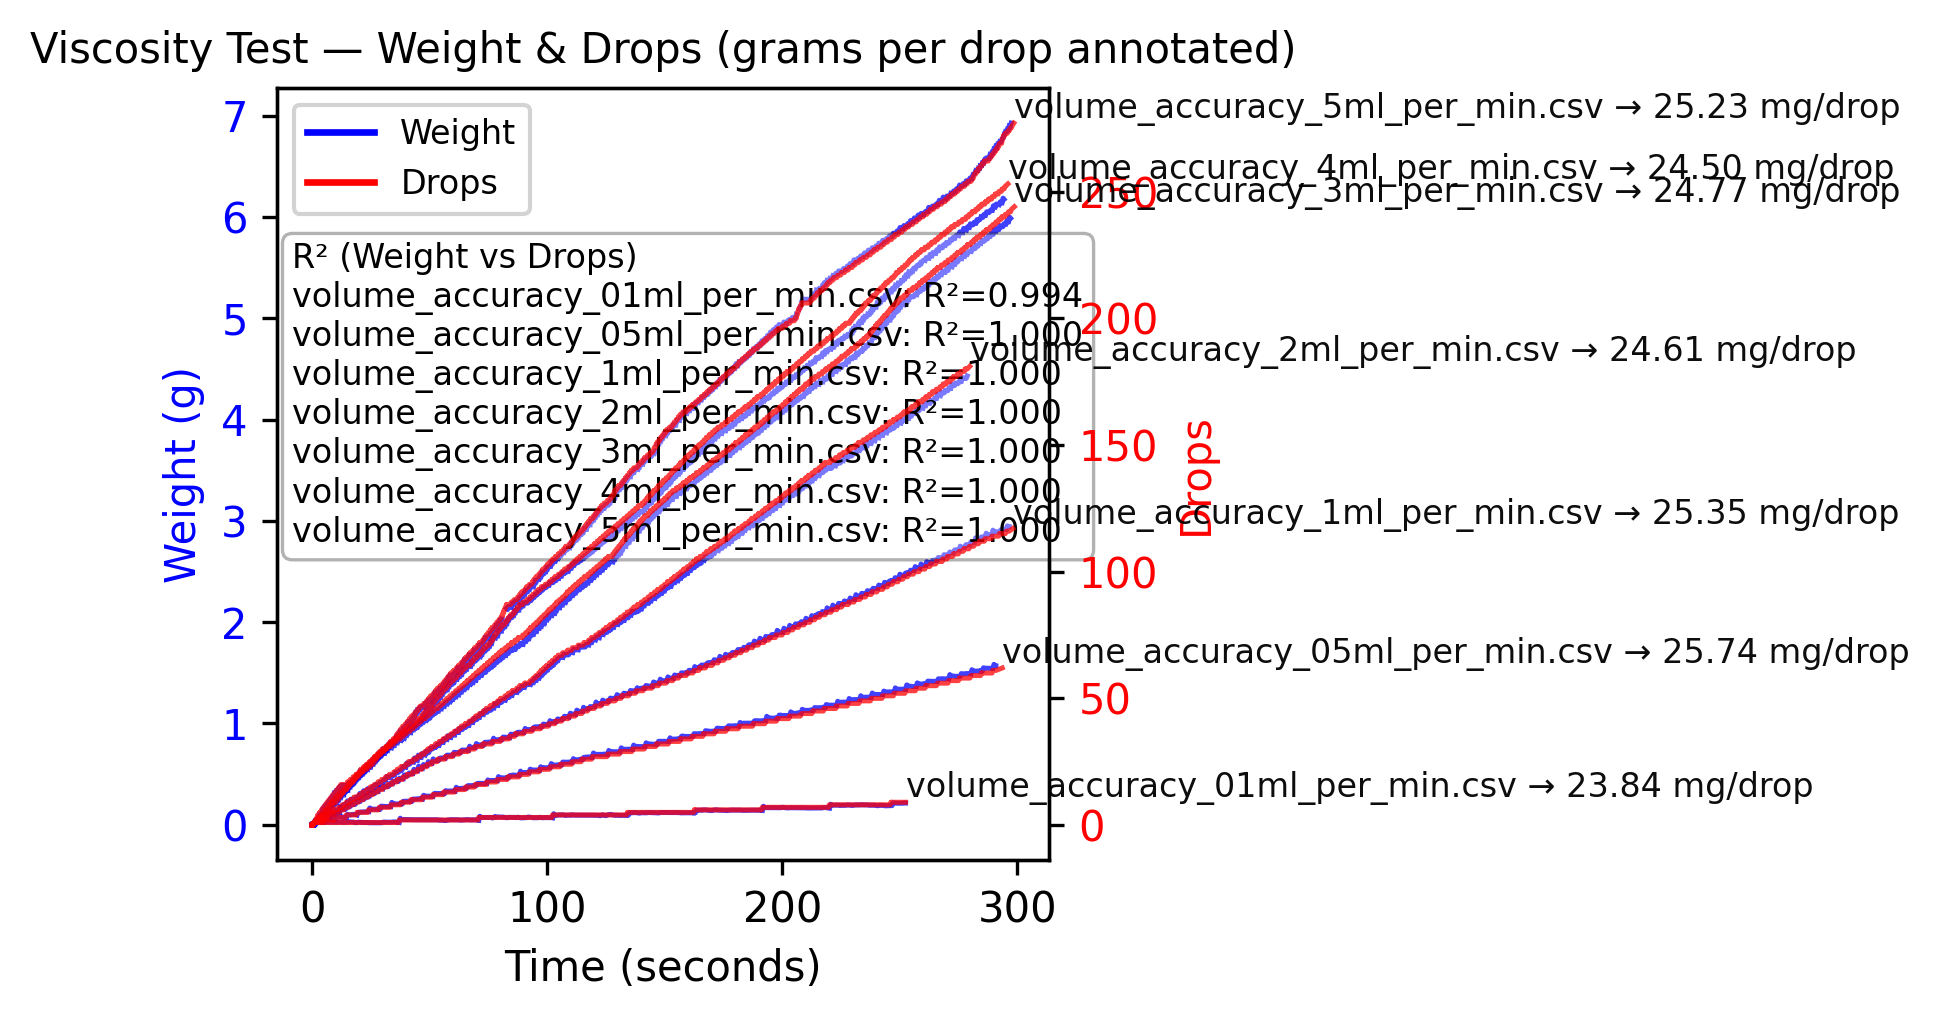


=== Grams per Drop Summary ===
                               file                             label  \
0  volume_accuracy_01ml_per_min.csv  volume_accuracy_01ml_per_min.csv   
1  volume_accuracy_05ml_per_min.csv  volume_accuracy_05ml_per_min.csv   
2   volume_accuracy_1ml_per_min.csv   volume_accuracy_1ml_per_min.csv   
3   volume_accuracy_2ml_per_min.csv   volume_accuracy_2ml_per_min.csv   
4   volume_accuracy_3ml_per_min.csv   volume_accuracy_3ml_per_min.csv   
5   volume_accuracy_4ml_per_min.csv   volume_accuracy_4ml_per_min.csv   
6   volume_accuracy_5ml_per_min.csv   volume_accuracy_5ml_per_min.csv   

   grams_per_drop  mg_per_drop  R2_weight_vs_drops  
0          0.0238      23.8449              0.9939  
1          0.0257      25.7427              0.9996  
2          0.0254      25.3547              0.9998  
3          0.0246      24.6130              0.9999  
4          0.0248      24.7703              0.9999  
5          0.0245      24.5012              0.9999  
6          0

In [1]:
import os, re, itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# === File List (in desired order) ===
csv_files = [
    "volume_accuracy_01ml_per_min.csv",
    "volume_accuracy_05ml_per_min.csv",
    "volume_accuracy_1ml_per_min.csv",
    "volume_accuracy_2ml_per_min.csv",
    "volume_accuracy_3ml_per_min.csv",
    "volume_accuracy_4ml_per_min.csv",
    "volume_accuracy_5ml_per_min.csv"
]

def _linfit_r2(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[m], y[m], 1)
    yhat = a * x[m] + b
    ss_res = np.sum((y[m] - yhat)**2)
    ss_tot = np.sum((y[m] - y[m].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _pretty_visc_label(file):
    """
    From: viscosity_accuracy_1ml_per_min_50cP_small.csv
    To:   1 mL/min, 50 cP
    """
    m = re.search(r"viscosity_accuracy_(.+?)_per_min_(\d+)cP", file)
    if m:
        rate_raw = m.group(1)  # e.g., "1ml"
        visc_cp = m.group(2)   # e.g., "50"
        rate_num = re.sub(r"ml$", "", rate_raw)
        try:
            rate_num = float(rate_num)
            rate_str = f"{rate_num:g} mL/min"
        except Exception:
            rate_str = f"{rate_raw} /min"
        return f"{rate_str}, {visc_cp} cP"
    # Fallback
    return os.path.basename(file)

def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found (expected 'drop_counter' or 'vernier_drop').")

def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# === Plot ALL (shift to 1s before first drop, re-zero drops) and annotate g/drop ===
def plot_all_viscosity_g_per_drop(files):
    records = []
    table_rows = []  # for console summary

    for file in files:
        if not os.path.exists(file):
            print(f"[WARN] File not found: {file}")
            continue

        df = pd.read_csv(file)
        if "timestamp" not in df.columns or "weight" not in df.columns:
            print(f"[WARN] Missing required columns in {file}; skipping.")
            continue

        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
        if df["timestamp"].isna().all():
            print(f"[WARN] All timestamps NaT in {file}; skipping.")
            continue

        weight = pd.to_numeric(df["weight"], errors="coerce")
        drops  = _get_drop_series(df)

        # Shift start: 1 s before first detected drop
        i_first = _first_drop_index(drops)
        first_ts = df["timestamp"].iloc[i_first] if i_first < len(df) else df["timestamp"].dropna().iloc[0]
        if pd.isna(first_ts):
            first_ts = df["timestamp"].dropna().iloc[0]
        start_ts = first_ts - pd.Timedelta(seconds=1)
        start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

        df = df.iloc[start_idx:].copy()
        if len(df) < 2:
            print(f"[WARN] Not enough data after shifting in {file}; skipping.")
            continue

        weight = weight.iloc[start_idx:].reset_index(drop=True)
        drops  = drops.iloc[start_idx:].reset_index(drop=True)

        # Time axis and drop re-zero
        df["time_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()
        drops = drops - drops.iloc[0]

        # grams/drop by OLS: weight ~ a*drops + b
        a_g_per_drop, b_w0, r2_wd = _linfit_r2(drops, weight)
        mg_per_drop = a_g_per_drop * 1000.0 if np.isfinite(a_g_per_drop) else np.nan

        label = _pretty_visc_label(file)
        records.append(dict(
            label=label,
            t=df["time_sec"].to_numpy(),
            w=weight.to_numpy(),
            d=drops.to_numpy(),
            g_per_drop=a_g_per_drop,
            mg_per_drop=mg_per_drop,
            r2=r2_wd
        ))

        table_rows.append({
            "file": os.path.basename(file),
            "label": label,
            "grams_per_drop": a_g_per_drop,
            "mg_per_drop": mg_per_drop,
            "R2_weight_vs_drops": r2_wd
        })

    if not records:
        print("[WARN] No valid files to plot.")
        return

    # === Plot
    fig, ax1 = plt.subplots(figsize=(6, 3.5), dpi=300)
    ax2 = ax1.twinx()

    # Plot each series
    for rec in records:
        ax1.plot(rec["t"], rec["w"], "-", color="blue", linewidth=1.2, alpha=0.75)
        ax2.plot(rec["t"], rec["d"], "-", color="red",  linewidth=1.2, alpha=0.75)

    # Axes labels
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Weight (g)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax2.set_ylabel("Drops", color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    # Simple 2-item legend
    legend_lines = [
        Line2D([0], [0], color="blue", linewidth=1.6, label="Weight"),
        Line2D([0], [0], color="red",  linewidth=1.6, label="Drops"),
    ]
    ax1.legend(handles=legend_lines, loc="upper left", fontsize=8, framealpha=0.85)

    # Annotation offset on the right axis
    d_all = [rec["d"] for rec in records if len(rec["d"]) > 0]
    if d_all:
        d_concat = np.concatenate(d_all)
        dy = np.nanmax(d_concat) - np.nanmin(d_concat)
        d_offset = 0.02 * dy if np.isfinite(dy) and dy > 0 else 0.0
    else:
        d_offset = 0.0

    # Annotate mg/drop near the tail of each RED curve
    for rec in records:
        xt = rec["t"][-1]
        yt = rec["d"][-1] + d_offset
        mg_txt = f"{rec['mg_per_drop']:.2f} mg/drop" if np.isfinite(rec["mg_per_drop"]) else "n/a"
        ax2.text(
            xt, yt,
            f"{rec['label']} → {mg_txt}",
            color="black", fontsize=8, ha="left", va="center", alpha=0.95,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.0, linewidth=0.0)
        )

    # Optional: R² summary box
    r2_lines = [
        f"{rec['label']}: R²={rec['r2']:.3f}" if np.isfinite(rec['r2']) else f"{rec['label']}: R²=n/a"
        for rec in records
    ]
    ax1.text(
        0.02, 0.80, "R² (Weight vs Drops)\n" + "\n".join(r2_lines),
        transform=ax1.transAxes, ha="left", va="top", fontsize=8,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.3, linewidth=0.8)
    )

    plt.title("Viscosity Test — Weight & Drops (grams per drop annotated)", fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close(fig)

    # === Console summary
    df_summary = pd.DataFrame(table_rows)
    if not df_summary.empty:
        with pd.option_context('display.max_rows', None, 'display.float_format', '{:.4f}'.format):
            print("\n=== Grams per Drop Summary ===")
            print(df_summary[["file", "label", "grams_per_drop", "mg_per_drop", "R2_weight_vs_drops"]])
    else:
        print("[WARN] No summary to print.")

# === Run ===
plot_all_viscosity_g_per_drop(csv_files)


# Viscosity

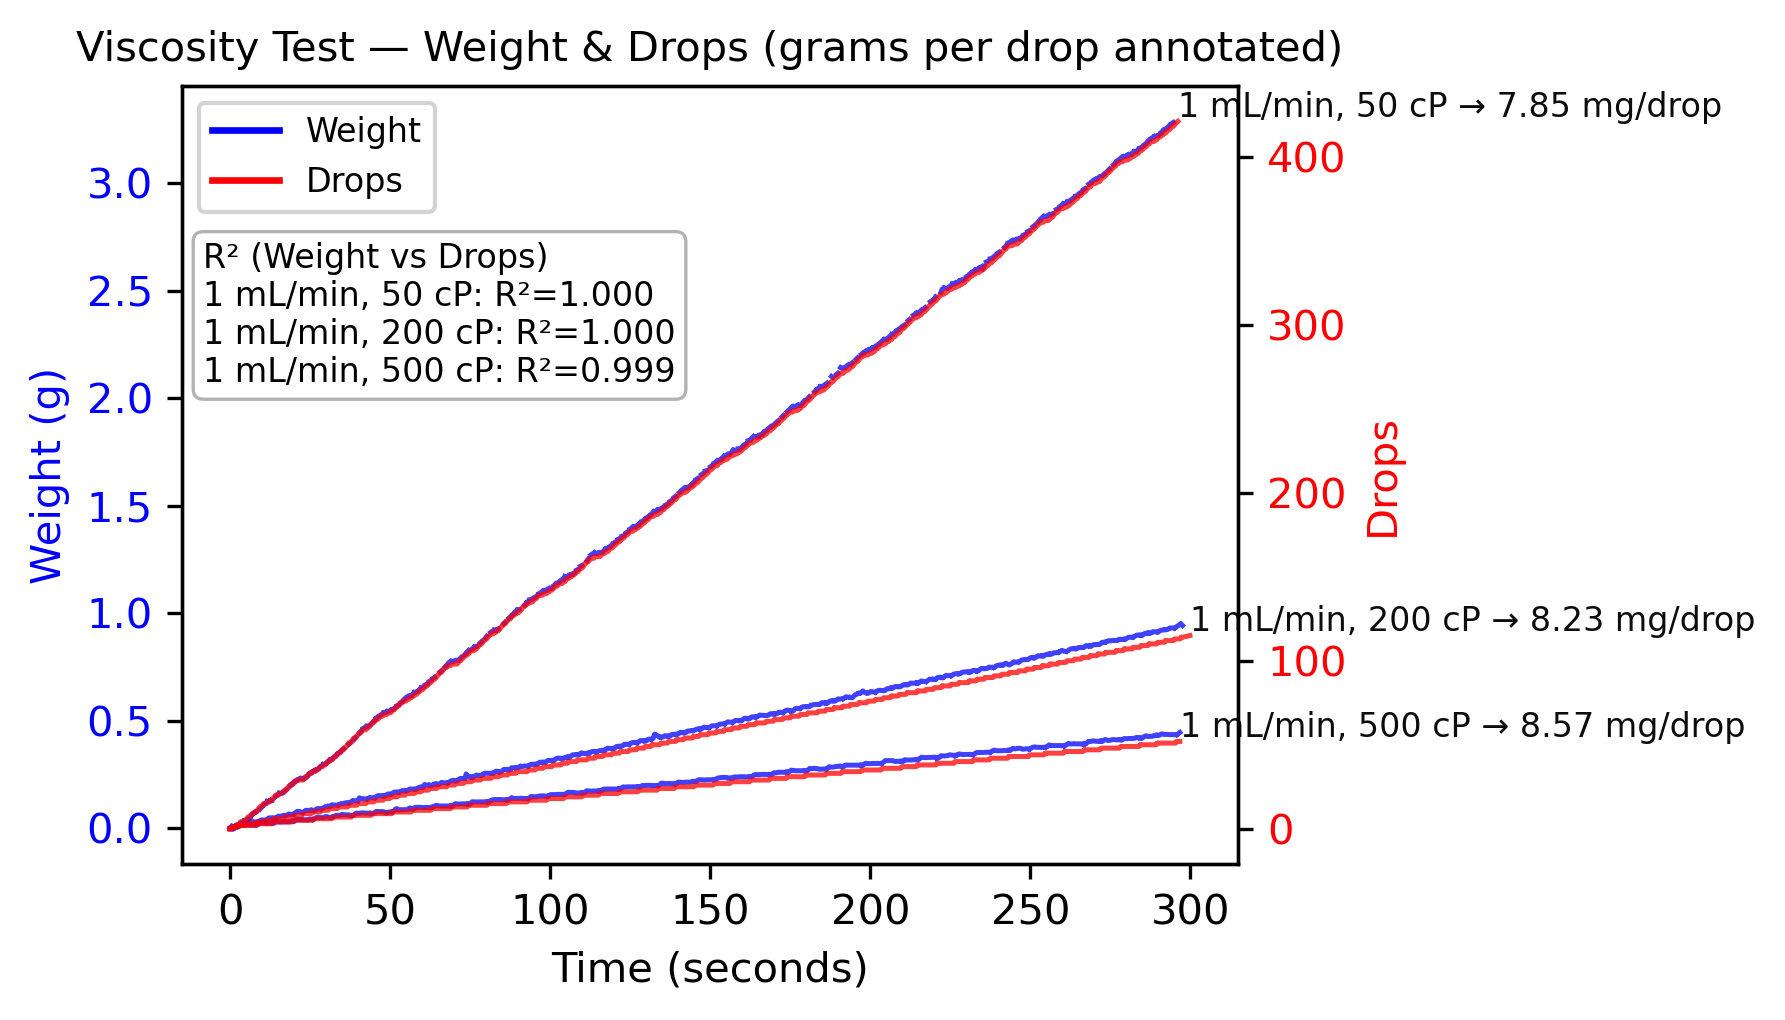


=== Grams per Drop Summary ===
                                             file             label  \
0   viscosity_accuracy_1ml_per_min_50cP_small.csv   1 mL/min, 50 cP   
1  viscosity_accuracy_1ml_per_min_200cP_small.csv  1 mL/min, 200 cP   
2  viscosity_accuracy_1ml_per_min_500cP_small.csv  1 mL/min, 500 cP   

   grams_per_drop  mg_per_drop  R2_weight_vs_drops  
0          0.0079       7.8531              1.0000  
1          0.0082       8.2293              0.9997  
2          0.0086       8.5746              0.9992  


In [11]:
import os, re, itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# === File List (in desired order) ===
csv_files = [
    "viscosity_accuracy_1ml_per_min_50cP_small.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small.csv"
]

def _linfit_r2(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[m], y[m], 1)
    yhat = a * x[m] + b
    ss_res = np.sum((y[m] - yhat)**2)
    ss_tot = np.sum((y[m] - y[m].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _pretty_visc_label(file):
    """
    From: viscosity_accuracy_1ml_per_min_50cP_small.csv
    To:   1 mL/min, 50 cP
    """
    m = re.search(r"viscosity_accuracy_(.+?)_per_min_(\d+)cP", file)
    if m:
        rate_raw = m.group(1)  # e.g., "1ml"
        visc_cp = m.group(2)   # e.g., "50"
        rate_num = re.sub(r"ml$", "", rate_raw)
        try:
            rate_num = float(rate_num)
            rate_str = f"{rate_num:g} mL/min"
        except Exception:
            rate_str = f"{rate_raw} /min"
        return f"{rate_str}, {visc_cp} cP"
    # Fallback
    return os.path.basename(file)

def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found (expected 'drop_counter' or 'vernier_drop').")

def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# === Plot ALL (shift to 1s before first drop, re-zero drops) and annotate g/drop ===
def plot_all_viscosity_g_per_drop(files):
    records = []
    table_rows = []  # for console summary

    for file in files:
        if not os.path.exists(file):
            print(f"[WARN] File not found: {file}")
            continue

        df = pd.read_csv(file)
        if "timestamp" not in df.columns or "weight" not in df.columns:
            print(f"[WARN] Missing required columns in {file}; skipping.")
            continue

        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
        if df["timestamp"].isna().all():
            print(f"[WARN] All timestamps NaT in {file}; skipping.")
            continue

        weight = pd.to_numeric(df["weight"], errors="coerce")
        drops  = _get_drop_series(df)

        # Shift start: 1 s before first detected drop
        i_first = _first_drop_index(drops)
        first_ts = df["timestamp"].iloc[i_first] if i_first < len(df) else df["timestamp"].dropna().iloc[0]
        if pd.isna(first_ts):
            first_ts = df["timestamp"].dropna().iloc[0]
        start_ts = first_ts - pd.Timedelta(seconds=1)
        start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

        df = df.iloc[start_idx:].copy()
        if len(df) < 2:
            print(f"[WARN] Not enough data after shifting in {file}; skipping.")
            continue

        weight = weight.iloc[start_idx:].reset_index(drop=True)
        drops  = drops.iloc[start_idx:].reset_index(drop=True)

        # Time axis and drop re-zero
        df["time_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()
        drops = drops - drops.iloc[0]

        # grams/drop by OLS: weight ~ a*drops + b
        a_g_per_drop, b_w0, r2_wd = _linfit_r2(drops, weight)
        mg_per_drop = a_g_per_drop * 1000.0 if np.isfinite(a_g_per_drop) else np.nan

        label = _pretty_visc_label(file)
        records.append(dict(
            label=label,
            t=df["time_sec"].to_numpy(),
            w=weight.to_numpy(),
            d=drops.to_numpy(),
            g_per_drop=a_g_per_drop,
            mg_per_drop=mg_per_drop,
            r2=r2_wd
        ))

        table_rows.append({
            "file": os.path.basename(file),
            "label": label,
            "grams_per_drop": a_g_per_drop,
            "mg_per_drop": mg_per_drop,
            "R2_weight_vs_drops": r2_wd
        })

    if not records:
        print("[WARN] No valid files to plot.")
        return

    # === Plot
    fig, ax1 = plt.subplots(figsize=(6, 3.5), dpi=300)
    ax2 = ax1.twinx()

    # Plot each series
    for rec in records:
        ax1.plot(rec["t"], rec["w"], "-", color="blue", linewidth=1.2, alpha=0.75)
        ax2.plot(rec["t"], rec["d"], "-", color="red",  linewidth=1.2, alpha=0.75)

    # Axes labels
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Weight (g)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax2.set_ylabel("Drops", color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    # Simple 2-item legend
    legend_lines = [
        Line2D([0], [0], color="blue", linewidth=1.6, label="Weight"),
        Line2D([0], [0], color="red",  linewidth=1.6, label="Drops"),
    ]
    ax1.legend(handles=legend_lines, loc="upper left", fontsize=8, framealpha=0.85)

    # Annotation offset on the right axis
    d_all = [rec["d"] for rec in records if len(rec["d"]) > 0]
    if d_all:
        d_concat = np.concatenate(d_all)
        dy = np.nanmax(d_concat) - np.nanmin(d_concat)
        d_offset = 0.02 * dy if np.isfinite(dy) and dy > 0 else 0.0
    else:
        d_offset = 0.0

    # Annotate mg/drop near the tail of each RED curve
    for rec in records:
        xt = rec["t"][-1]
        yt = rec["d"][-1] + d_offset
        mg_txt = f"{rec['mg_per_drop']:.2f} mg/drop" if np.isfinite(rec["mg_per_drop"]) else "n/a"
        ax2.text(
            xt, yt,
            f"{rec['label']} → {mg_txt}",
            color="black", fontsize=8, ha="left", va="center", alpha=0.95,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.0, linewidth=0.0)
        )

    # Optional: R² summary box
    r2_lines = [
        f"{rec['label']}: R²={rec['r2']:.3f}" if np.isfinite(rec['r2']) else f"{rec['label']}: R²=n/a"
        for rec in records
    ]
    ax1.text(
        0.02, 0.80, "R² (Weight vs Drops)\n" + "\n".join(r2_lines),
        transform=ax1.transAxes, ha="left", va="top", fontsize=8,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.3, linewidth=0.8)
    )

    plt.title("Viscosity Test — Weight & Drops (grams per drop annotated)", fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close(fig)

    # === Console summary
    df_summary = pd.DataFrame(table_rows)
    if not df_summary.empty:
        with pd.option_context('display.max_rows', None, 'display.float_format', '{:.4f}'.format):
            print("\n=== Grams per Drop Summary ===")
            print(df_summary[["file", "label", "grams_per_drop", "mg_per_drop", "R2_weight_vs_drops"]])
    else:
        print("[WARN] No summary to print.")

# === Run ===
plot_all_viscosity_g_per_drop(csv_files)
